# Power calculations
This notebook calculates the minimal detectable effect (MDE) for analysis of a single 4 point Likert scale question from the TIPSS classroom observation tool. The purpose of these power calculations is to determine...

1. In Delhi, should we conduct classroom observations using the 810 teachers that STIR initially targeted or also conduct classroom observations for all teachers that joined schools before a specific date.
2. In UP, should we only conduct classroom observations for those teachers from the baseline or increase our sample

These power calculations spit out MDE as the output.  In assessing whether an average change on a Likert scale question is large or small, I found [this article](https://www.washingtonpost.com/blogs/monkey-cage/wp/2014/12/19/pushing-at-an-open-door-when-can-personal-stories-change-minds-on-gay-rights/) helpful. The author points out that for a 5 point Likert scale question, an average change of 0.8 is massive and rarely seen.  In esitmating power, I use the following assumptions:
1. standard deviation = .5 (this roughly corresponds to the case where 15% of the question responses are 1s, 35% are 2s, 35% are 3s, and 15% are 4s.)
2. $\rho$ = .22 (Copying this from Stuart's original do file)
3. no covariates at either the school or teacher level
4. There are 80 schools in treatment and 80 schools in control. (There are actually 120 treatment and 60 control. This seemed like a reasonable fudge.)

The formula for MDE given the other inputs is...

$$ MDE = 2M_J\sigma_y\sqrt{\frac{\rho}{J}+\frac{1-\rho}{JK}} $$

Where...

$$ M_J = F^{-1}_t\left(1-\frac{\alpha}{2},J\right) + F^{-1}_t\left(1-\beta,J\right) $$

And J is number of schools in treatment, K is number of teachers per school, and $\sigma_y$ is the standard deviation of the outcome variable.

In [1]:
import scipy.stats as stats

# hard code assumptions
std = .5
rho = .22
J = 80 # J = number of schools in control group
K = 10
alpha = .05
num_test = 19

# define function for calculating MDE
def mde(J,K,alpha, num_test, rho, std):
    adj_alpha = alpha/num_test
    M = stats.t.ppf(1-adj_alpha/2,J)+stats.t.ppf(.8,J)
    mde = 2*M*std*((rho/J) +(1-rho)/(J*K))**.5
    return mde

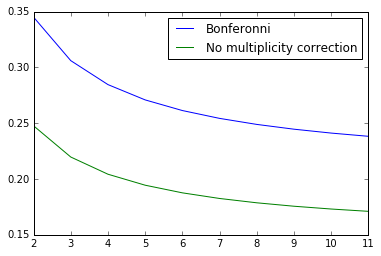

In [4]:
# MDE versus number of teachers per school for various values of K
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ran = np.arange(2,12)
y = np.asarray([mde(J,k,alpha, num_test, rho, std) for k in ran])
plt.plot(ran,y, label = 'Bonferonni')

# same thing but with no correction for multiplicity
y2 = np.asarray([mde(J,k,alpha, 1, rho, std) for k in ran])
plt.plot(ran, y2, label='No multiplicity correction')
plt.legend()